In [1]:
from nearline_helpers import *

Welcome to JupyROOT 6.26/10


In [2]:
t = r.TChain("tree")
# t.Add("../bin/run00251_*.mid.root")
t.Add("../bin/run00330_*.mid.root")

1

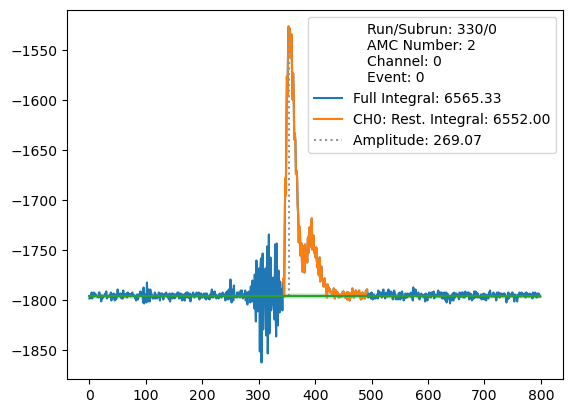

In [3]:
for i, e in enumerate(t):
    for wfi in e.integrals:
        if(wfi.amcNum > 1):
            plot_integral(wfi)
    break

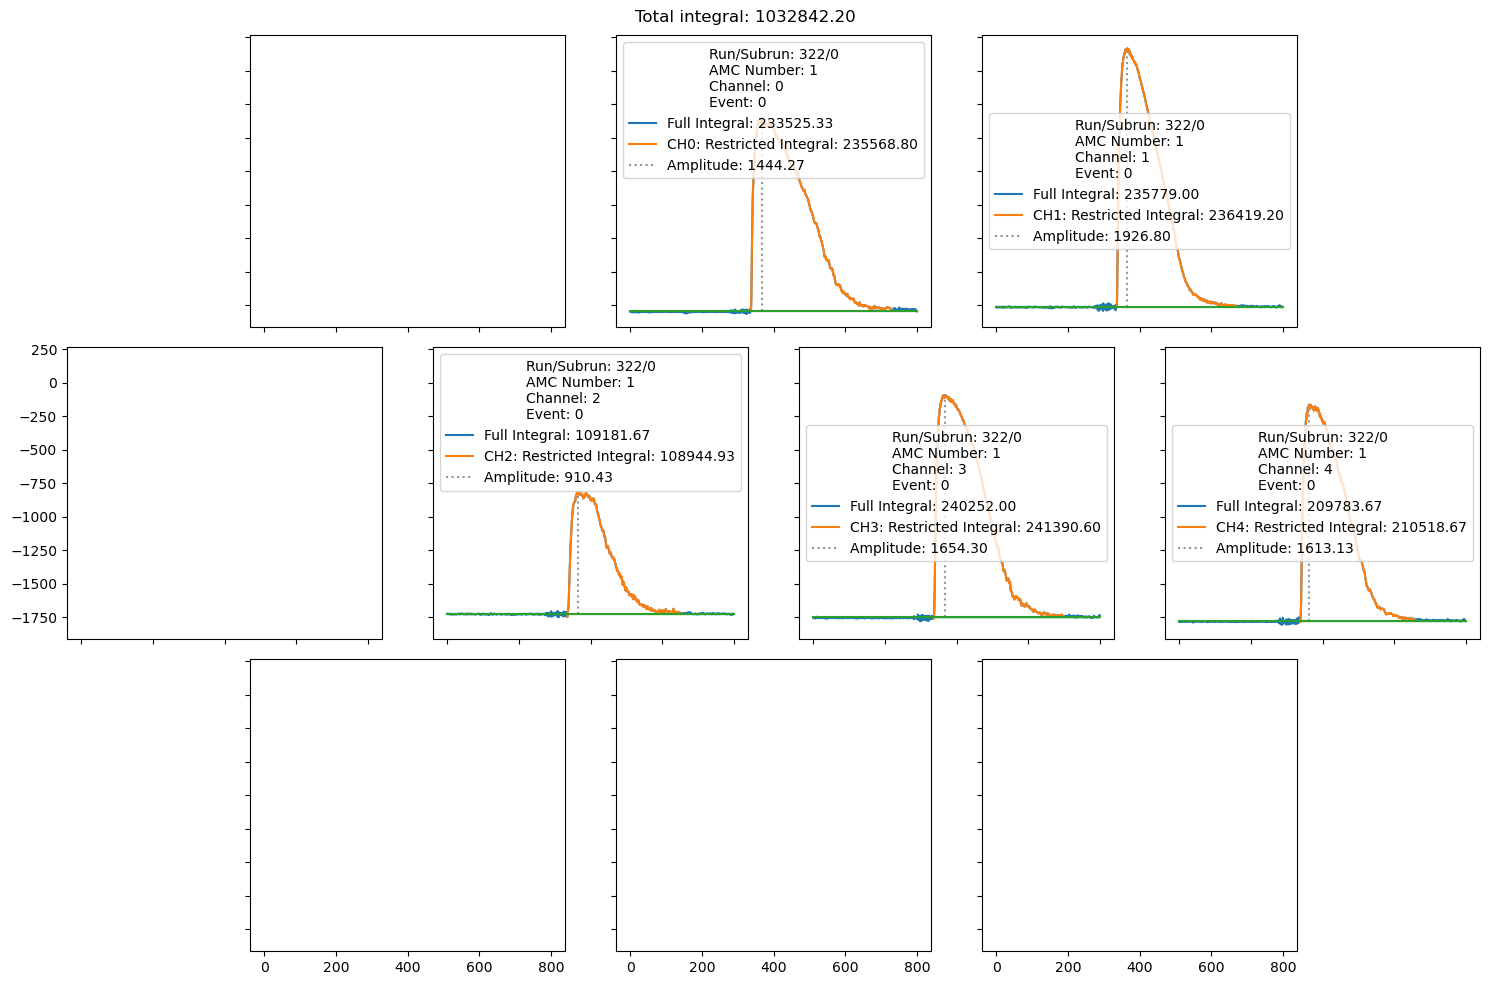

In [6]:
for i, e in enumerate(t):
    fig,ax = plot_event(e.integrals)
    # plt.tight_layout()
    plt.show()
    break

In [33]:
import uproot 
import hist

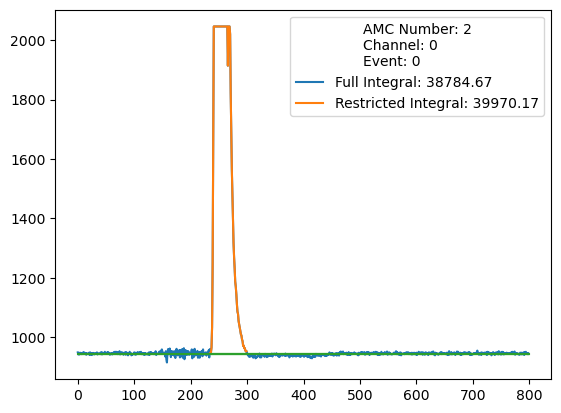

In [47]:
for i, e in enumerate(t):
    for wf in e.integrals:
        if(wf.amcNum == 2):
            plot_integral(wf)
            break 

    break

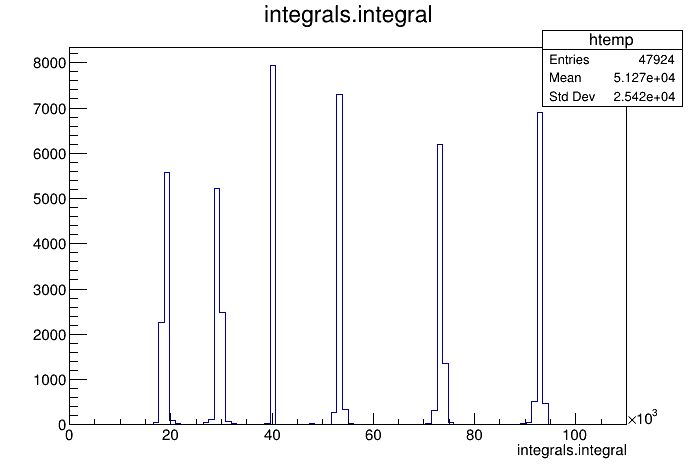

In [36]:
c= r.TCanvas()
t.Draw("integrals.integral")
c.Draw()

0 53274.71950873694 1457.6568358608347
1 92757.06279516054 3293.246350777722
2 18900.335090795164 960.5751434031198
3 73221.23679512863 2034.828157165207
4 29526.578584240524 1136.7285911518413


Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


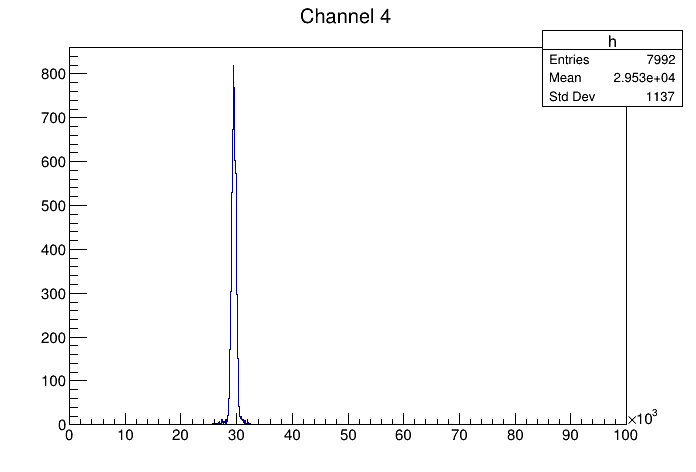

In [37]:
amc = 1

hists = {}
for channel in range(5):
    c = r.TCanvas()
    # ch1.Draw("integrals.integral", f"integrals.amcNum == {amc} && integrals.channelTag == {channel}","")
    # ch2.Draw("integrals.integral", f"integrals.amcNum == {amc} && integrals.channelTag == {channel}","same")
    # c.SetLogy()
    # ch1.Draw("integrals.integral>>h( 100,20000,45000)", f"integrals.amcNum == {amc} && integrals.channelTag == {channel}","")
    h = r.TH1D("h",f"Channel {channel}",1000,0,100000)
    h.Reset()
    t.Draw("integrals.integral>>h", f"integrals.amcNum == {amc} && integrals.channelTag == {channel}","")
    print(channel,h.GetMean(), h.GetStdDev())
    hists[channel] = uproot.from_pyroot(h).to_hist()
    # c.Print(f"./channel{channel}.png")
    c.Draw()

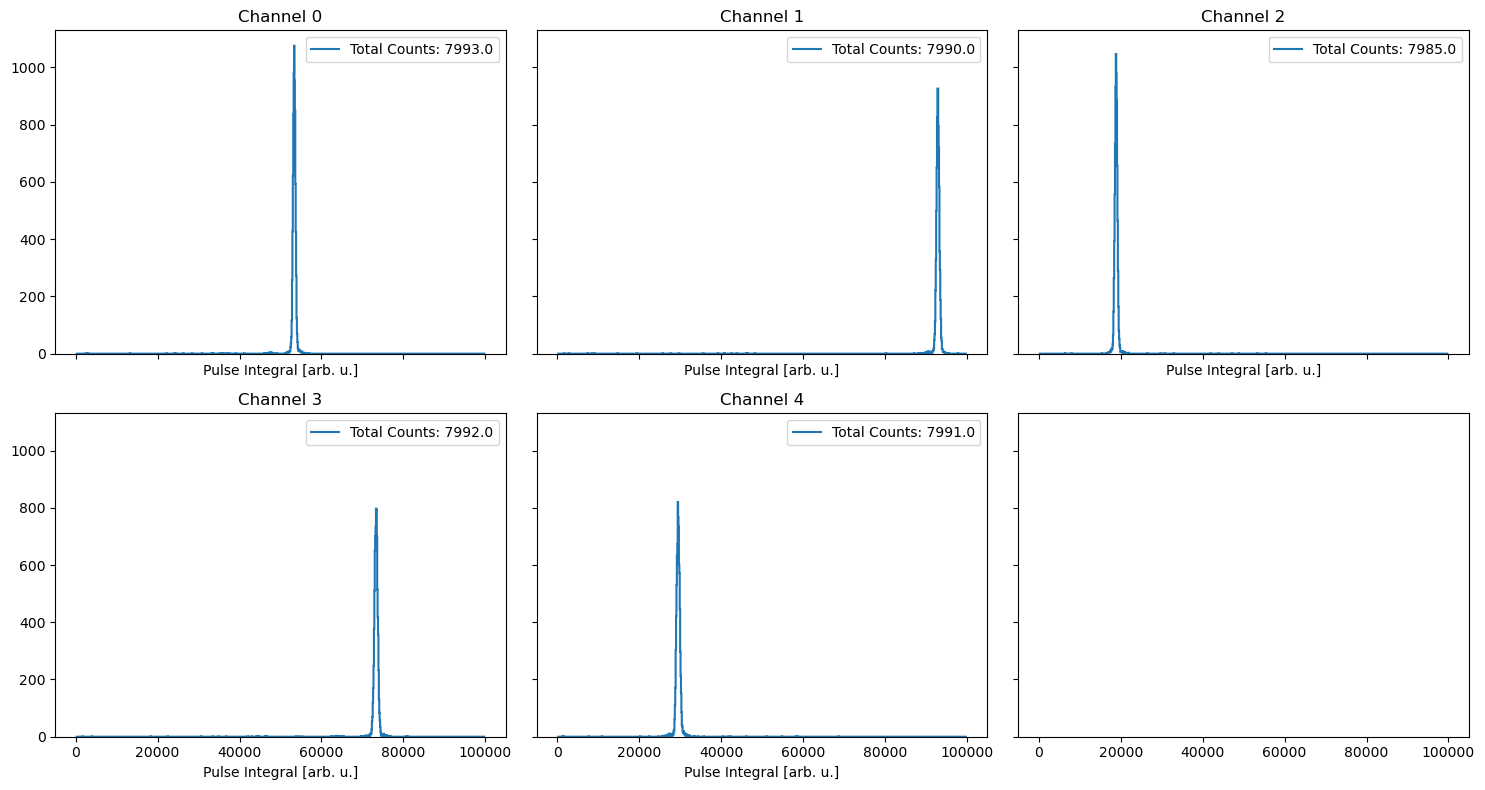

In [38]:
fig,ax = plt.subplots(2,3,figsize=(15,8),sharex=True,sharey=True)
for channel in hists:    
    axi = ax.ravel()[channel]
    h = hists[channel]
    # h2 = hists_orig[channel]
    # label=f'Run'
    axi.set_title(f'Channel {channel}')
    hi = h
    # hi2 = h2[16000j:45000j:hist.rebin(2)]
    counts = np.sum(hi.values())
    hi.plot(
        ax=axi, yerr=False,
        label=f'Total Counts: {counts}'
    )
    axi.legend()
    axi.set_xlabel("Pulse Integral [arb. u.]")
plt.tight_layout()
# plt.yscale("log")
plt.show()

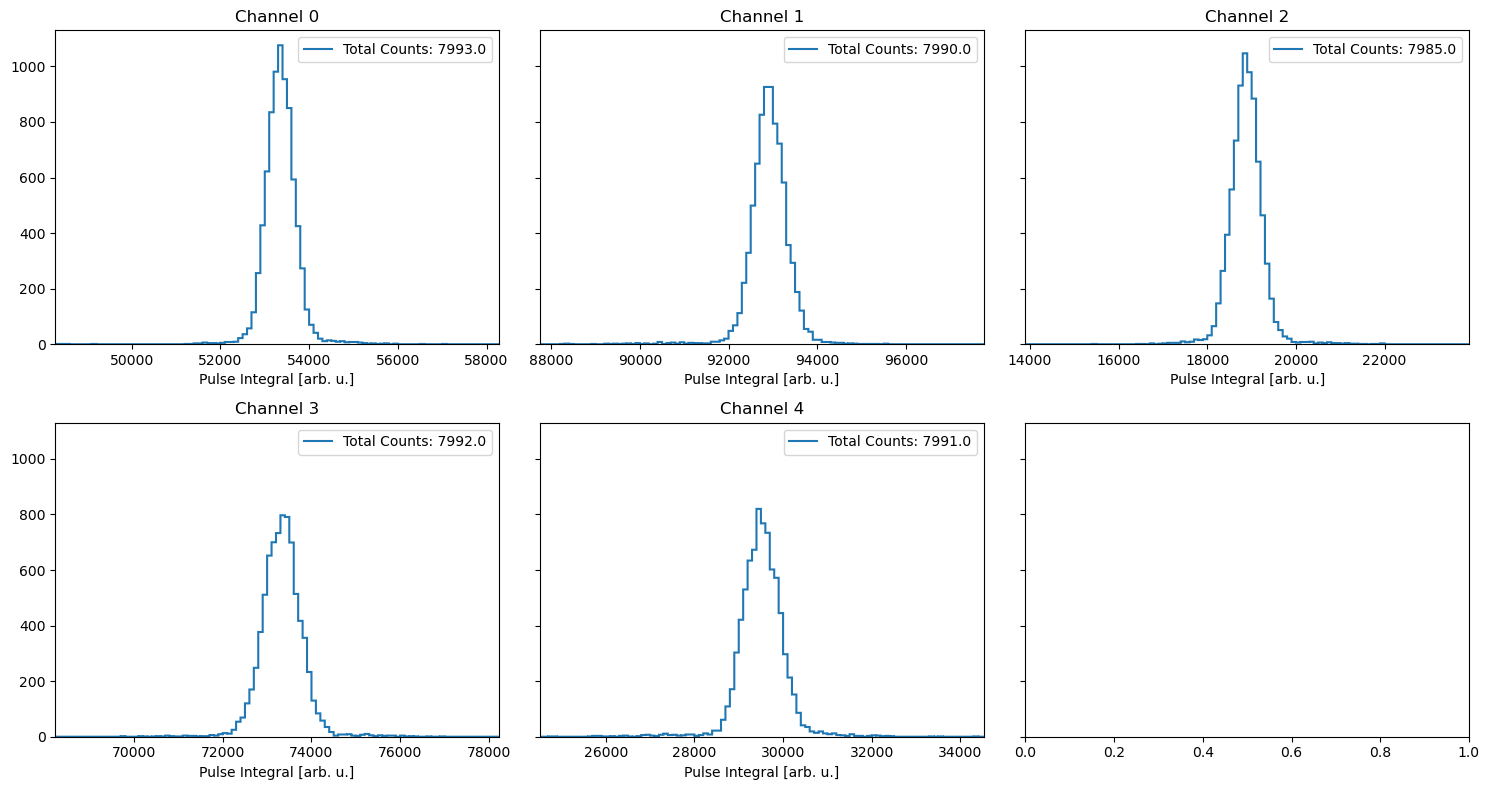

In [45]:
fig,ax = plt.subplots(2,3,figsize=(15,8),sharey=True)
for channel in hists:    
    axi = ax.ravel()[channel]
    h = hists[channel]
    # h2 = hists_orig[channel]
    # label=f'Run'
    axi.set_title(f'Channel {channel}')
    hi = h
    # hi2 = h2[16000j:45000j:hist.rebin(2)]
    counts = np.sum(hi.values())
    hi.plot(
        ax=axi, yerr=False,
        label=f'Total Counts: {counts}'
    )
    mean = np.average(hi.axes[0].centers, weights=hi.values())
    axi.set_xlim(mean - 5000, mean+5000)
    axi.legend()
    axi.set_xlabel("Pulse Integral [arb. u.]")
plt.tight_layout()
# ax[2,3].
# plt.yscale("log")
plt.show()